# **Análisis del Consumo con Tarjetas de Crédito y Débito en Ecuador**

In [1]:
# === Importación de librerías ===
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# === Carga del archivo CSV desde Google Drive ===
from google.colab import drive
drive.mount('/content/drive')
# - Ruta específica
archivo = "/content/drive/MyDrive/Proyecto MBD/BDD - Estadísticas de tarjetas/Consumos Tarjetas consolidado 2021 - 2025.xlsx"

# === Generacion de anios a analizar
anios = [2021, 2022, 2023, 2024, 2025]
resultados = {}



Mounted at /content/drive


**Generacion de visualizacion de variables previo al analisis**

Se genera una visualizacion de variables haciendo uso de un diagrama de barras para obsevar el comportamiento del número transacciones, número tarjetas activas y monto facturado en los ultimos 5 anios.

In [2]:
# === Limpieza y filtrado de datos para variable Número_transacciones ===
for anio in anios:
    hoja = f"TablaTarjetas {anio}"

    # Leer hoja sin header
    df = pd.read_excel(archivo, sheet_name=hoja, header=None)

    # Filtrar SOLO filas "Suma de Transacciones"
    df_trans = df[
        df.iloc[:,0].astype(str).str.strip() == "Suma de Transacciones"
    ]

    # Tomar columnas Enero–Diciembre
    meses = df_trans.iloc[:,1:13].apply(pd.to_numeric, errors="coerce")

    # Suma total anual
    resultados[anio] = meses.sum().sum()

# Crear DataFrame final
df_resultados = pd.DataFrame.from_dict(
    resultados, orient="index", columns=["Total Transacciones"]
)

df_resultados

,Total Transacciones
2021,274336195.0
2022,328030781.0
2023,398217915.0
2024,464044111.0
2025,876125590.0


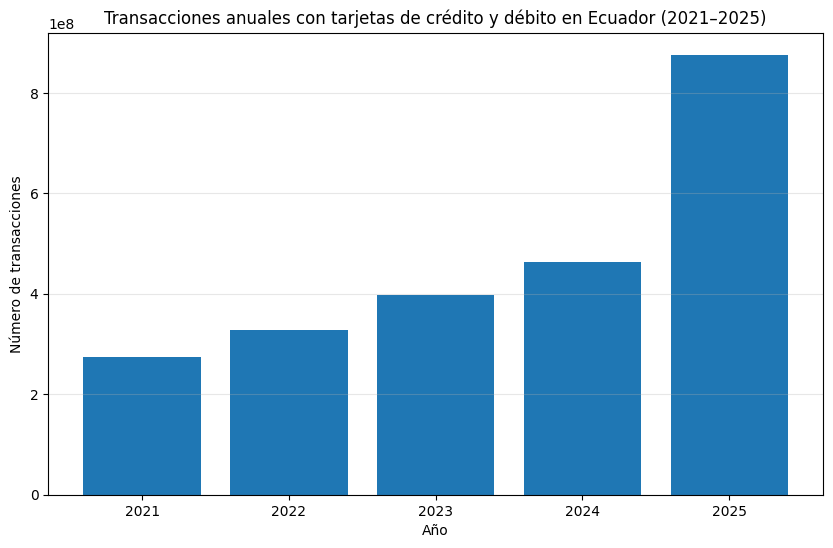

In [3]:
# === Generacion de grafico de barras de transacciones hechas con tarjetas de credito y debito a traves de los anios ===
plt.figure(figsize=(10,6))
plt.bar(
    df_resultados.index.astype(str),
    df_resultados["Total Transacciones"]
)

plt.title("Transacciones anuales con tarjetas de crédito y débito en Ecuador (2021–2025)")
plt.xlabel("Año")
plt.ylabel("Número de transacciones")
plt.grid(axis="y", alpha=0.3)

plt.show()


In [10]:
# === Limpieza y filtrado de datos para la variable Monto===
for anio in anios:
    hoja = f"TablaTarjetas {anio}"

    # Leer hoja sin header
    df = pd.read_excel(archivo, sheet_name=hoja, header=None)

    # Filtrar SOLO filas "Suma de Transacciones"
    df_trans = df[
        df.iloc[:,0].astype(str).str.strip() == "Suma de Monto facturado"
    ]

    # Tomar columnas Enero–Diciembre
    meses = df_trans.iloc[:,1:13].apply(pd.to_numeric, errors="coerce")

    # Suma total anual
    resultados[anio] = meses.sum().sum()

# Crear DataFrame final
df_resultados = pd.DataFrame.from_dict(
    resultados, orient="index", columns=["Total Montos"]
)

df_resultados

,Total Montos
2021,1.396946e+10
2022,1.691640e+10
2023,1.976327e+10
2024,2.066493e+10
2025,3.668853e+10


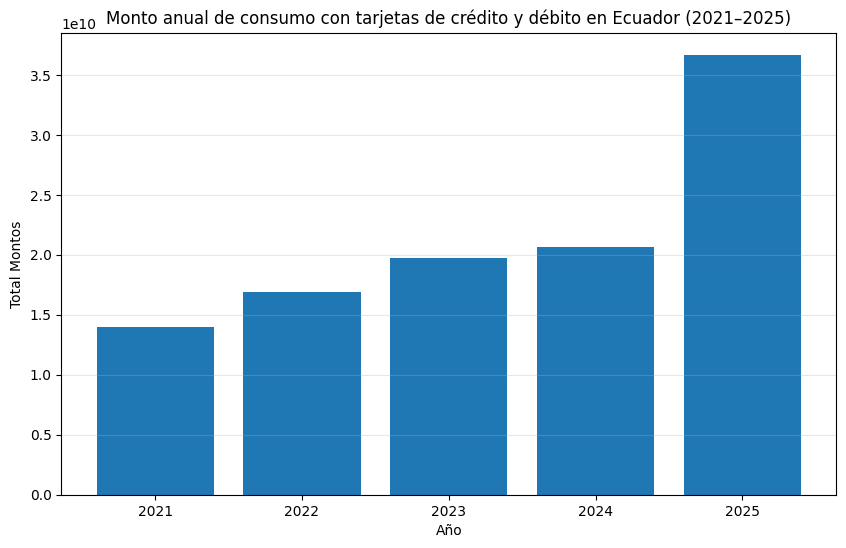

In [11]:
# === Generar un grafico de barras de montos hechos con tarjetas de credito y debito a traves de los anios ===
plt.figure(figsize=(10,6))
plt.bar(
    df_resultados.index.astype(str),
    df_resultados["Total Montos"]
)

plt.title("Monto anual de consumo con tarjetas de crédito y débito en Ecuador (2021–2025)")
plt.xlabel("Año")
plt.ylabel("Total Montos")
plt.grid(axis="y", alpha=0.3)

plt.show()


In [12]:
# === Limpieza y filtrado de datos para la variable Número_tarjetas_activas ===
for anio in anios:
    hoja = f"TablaTarjetas {anio}"

    # Leer hoja sin header
    df = pd.read_excel(archivo, sheet_name=hoja, header=None)

    # Filtrar SOLO filas "Suma de Transacciones"
    df_trans = df[
        df.iloc[:,0].astype(str).str.strip() == "Suma de Tarjetas"
    ]

    # Tomar columnas Enero–Diciembre
    meses = df_trans.iloc[:,1:13].apply(pd.to_numeric, errors="coerce")

    # Suma total anual
    resultados[anio] = meses.sum().sum()

# Crear DataFrame final
df_resultados = pd.DataFrame.from_dict(
    resultados, orient="index", columns=["Total Tarjetas"]
)

df_resultados

,Total Tarjetas
2021,51857635.0
2022,57976593.0
2023,66684122.0
2024,74556230.0
2025,136745488.0


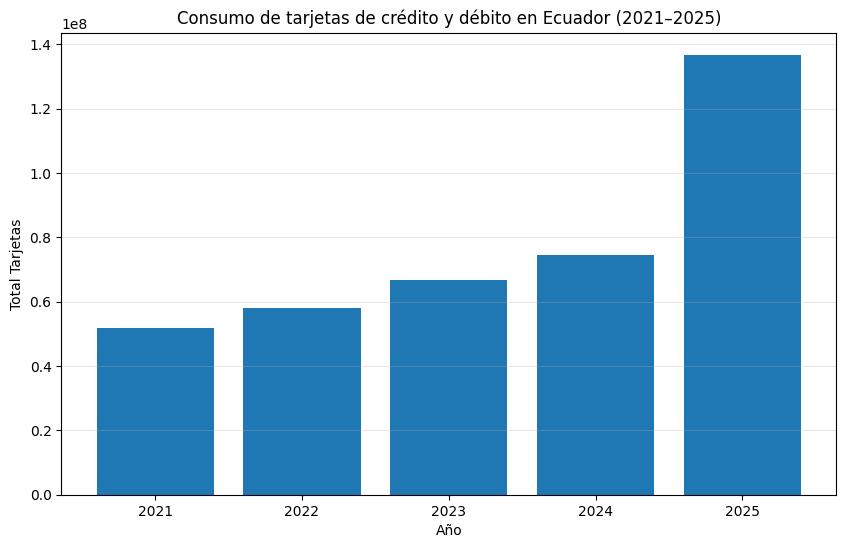

In [13]:
# === Generar un grafico de barras de consumo de tarjetas de credito y debito a traves de los anios ===
plt.figure(figsize=(10,6))
plt.bar(
    df_resultados.index.astype(str),
    df_resultados["Total Tarjetas"]
)

plt.title("Consumo de tarjetas de crédito y débito en Ecuador (2021–2025)")
plt.xlabel("Año")
plt.ylabel("Total Tarjetas")
plt.grid(axis="y", alpha=0.3)

plt.show()

**Generacion de la serie de tiempo de consumos hechos con tarjetas de credito y debito**

Se genera la serie de tiempo de consumos hechos con tarjetas de credito y debito en los meses validos para anio

In [15]:
# === Generacion de la serie de tiempo de consumos hechos con tarjetas de credito y debito ===

# Toma de meses válidos
meses_validos = [
    "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
    "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
]

# Lista para almacenar las series anuales
series_monto = []

# Extracción del monto facturado por año
for anio in anios:
    hoja = f"TablaTarjetas {anio}"
    df_raw = pd.read_excel(archivo, sheet_name=hoja, header=None)

    # Fila donde están los nombres de los meses
    fila_meses = df_raw.iloc[13]

    # Columnas que SÍ son meses
    columnas_meses = [
        i for i, v in fila_meses.items()
        if isinstance(v, str) and v.strip() in meses_validos
    ]

    # Fila "Suma de Monto facturado"
    fila_monto = df_raw[
        df_raw.iloc[:, 0].astype(str).str.strip() == "Total Suma de Monto facturado"
    ].iloc[0, columnas_meses].astype(float)

    # Crear índice temporal correcto
    fechas = pd.date_range(
        start=f"{anio}-01-01",
        periods=len(fila_monto),
        freq="ME"
    )

    series_monto.append(pd.Series(fila_monto.values, index=fechas))

# Serie final
serie_monto_total = pd.concat(series_monto)


**Visualizacion de la serie de tiempo de consumos mediante tarjetas de credito y debito**

Se realiza una visualización de la serie temporal del monto facturado mensual mediante tarjetas de crédito y débito para el período 2021–2025, con el fin de identificar tendencias, patrones estacionales y posibles cambios estructurales previos al modelado ARIMA.

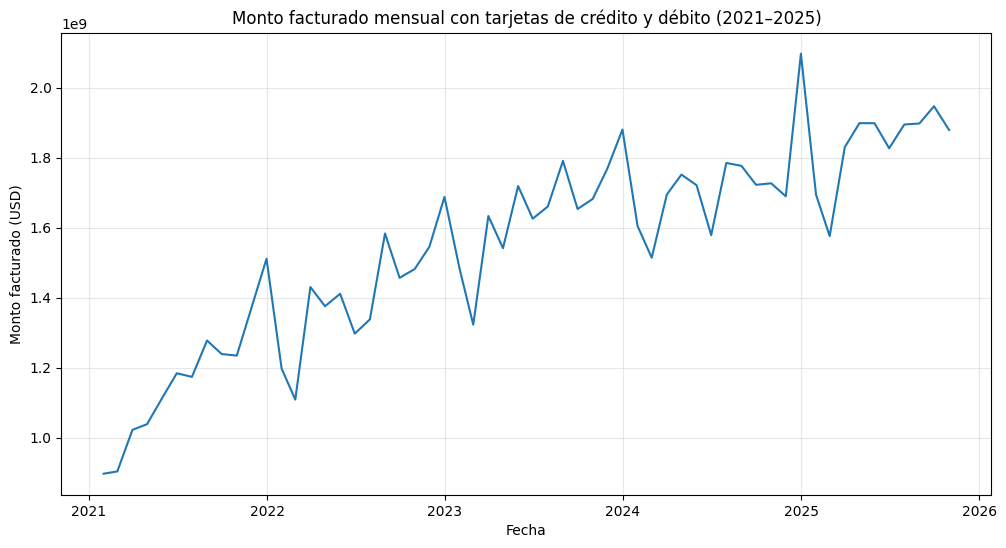

In [16]:
# Gráfica del monto facturado mensual con tarjetas
plt.figure(figsize=(12, 6))
plt.plot(serie_monto_total)
plt.title("Monto facturado mensual con tarjetas de crédito y débito (2021–2025)")
plt.xlabel("Fecha")
plt.ylabel("Monto facturado (USD)")
plt.grid(alpha=0.3)
plt.show()



**Prueba ADF (Augmented Dickey-Fuller)**

Se aplica la prueba de Dickey-Fuller Aumentada (ADF) con el objetivo de evaluar la estacionariedad de la serie temporal del monto facturado. Los resultados deben indicar que la serie es o no es estacionaria en niveles, en caso de no serlo es necesario aplicar un proceso de diferenciación previo a la estimación del modelo ARIMA.

**Hipótesis del ADF**

H₀ (hipótesis nula):
La serie NO es estacionaria (tiene raíz unitaria)

H₁ (hipótesis alternativa):
La serie SÍ es estacionaria

Regla de decisión:

Si p-value < 0.05 → Rechazo H₀ → Serie estacionaria

Si p-value ≥ 0.05 → No rechazo H₀ → Serie NO estacionaria


In [20]:
# === Prueba de Dickey-Fuller Aumentada (ADF) para estacionaridad ===

# importacion de libreria para prueba adf
from statsmodels.tsa.stattools import adfuller

# la prueba evalúa si la serie temporal es estacionaria.
# H0: La serie NO es estacionaria - tiene raíz unitaria
# H1: La serie ES estacionaria

resultado_adf = adfuller(serie_monto_total)

# Resultados principales
print("Estadístico ADF:", resultado_adf[0])
print("p-value:", resultado_adf[1])
print("Número de lags:", resultado_adf[2])
print("Número de observaciones:", resultado_adf[3])
print("Valor crítico:", resultado_adf[4])

# Interpretación automática
if resultado_adf[1] < 0.05:
    print("Conclusión: La serie es estacionaria (se rechaza H0).")
else:
    print("Conclusión: La serie NO es estacionaria (no se rechaza H0).")


Estadístico ADF: -2.097884635194017
p-value: 0.24536605067261008
Número de lags: 11
Número de observaciones: 46
Valor crítico: {'1%': np.float64(-3.5812576580093696), '5%': np.float64(-2.9267849124681518), '10%': np.float64(-2.6015409829867675)}
Conclusión: La serie NO es estacionaria (no se rechaza H0).


**Aplicacion de diferenciación**

Dado que la serie temporal del monto facturado no presentó estacionariedad en niveles, se aplicó una primera diferenciación. Posteriormente, se volvió a ejecutar la prueba Dickey-Fuller Aumentada, para evidenciar que la serie diferenciada es estacionaria, por lo que se establece un orden de diferenciación d = 1 para el modelo ARIMA.

In [21]:
# === Diferenciación de la serie temporal ===

# La diferenciación elimina la tendencia y ayuda a lograr estacionariedad.

# d = 1 significa primera diferencia.
serie_monto_diff = serie_monto_total.diff().dropna()

# Visualizar las primeras observaciones
serie_monto_diff.head()


,0
2021-02-28,6.622217e+06
2021-03-31,1.186288e+08
2021-04-30,1.636976e+07
2021-05-31,7.480700e+07
2021-06-30,7.057743e+07


In [22]:
# === Prueba ADF sobre la serie diferenciada ===

# Nueva ejecucion de prueba Dickey-Fuller Aumentada
resultado_adf_diff = adfuller(serie_monto_diff)

print("ADF Statistic (serie diferenciada):", resultado_adf_diff[0])
print("p-value (serie diferenciada):", resultado_adf_diff[1])
print("Número de lags (serie diferenciada):", resultado_adf_diff[2])
print("Número de observaciones (serie diferenciada):", resultado_adf_diff[3])
print("Valor crítico (serie diferenciada):", resultado_adf_diff[4])

# Interpretación automática
if resultado_adf_diff[1] < 0.05:
    print("Conclusión: La serie diferenciada es estacionaria (se rechaza H0).")
else:
    print("Conclusión: La serie diferenciada NO es estacionaria (no se rechaza H0).")



ADF Statistic (serie diferenciada): -5.063809754037716
p-value (serie diferenciada): 1.656847808246667e-05
Número de lags (serie diferenciada): 10
Número de observaciones (serie diferenciada): 46
Valor crítico (serie diferenciada): {'1%': np.float64(-3.5812576580093696), '5%': np.float64(-2.9267849124681518), '10%': np.float64(-2.6015409829867675)}
Conclusión: La serie diferenciada es estacionaria (se rechaza H0).


**Análisis de ACF y PACF**

Una vez verificada la estacionariedad de la serie diferenciada mediante la prueba ADF (p < 0.05), se procedió al análisis de los correlogramas ACF y PACF con el objetivo de identificar los órdenes autorregresivo (p) y de medias móviles (q) del modelo ARIMA.

- Determinar p (AR)

- Determinar q (MA)



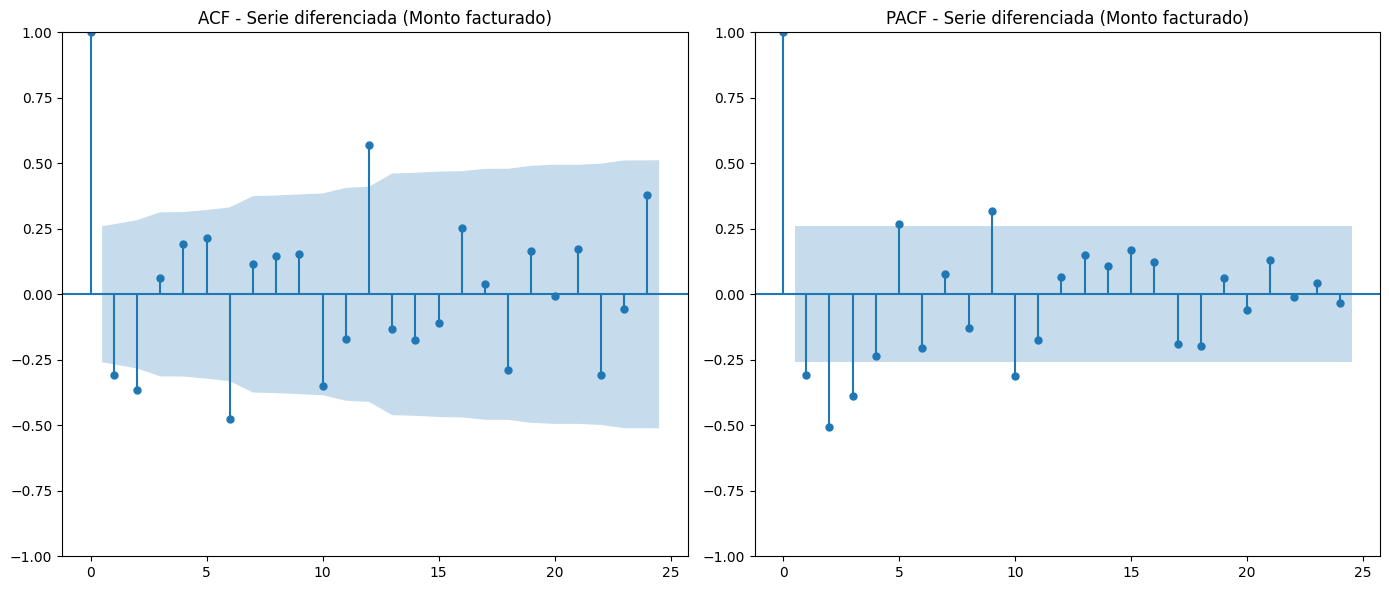

In [23]:
# === Análisis de ACF y PACF ===

# importacion de librerias para acf y pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Correlogramas ACF y PACF
plt.figure(figsize=(14,6))

# ACF
plt.subplot(1,2,1)
plot_acf(serie_monto_diff, ax=plt.gca(), lags=24)
plt.title("ACF - Serie diferenciada (Monto facturado)")

# PACF
plt.subplot(1,2,2)
plot_pacf(serie_monto_diff, ax=plt.gca(), lags=24, method='ywm')
plt.title("PACF - Serie diferenciada (Monto facturado)")

plt.tight_layout()
plt.show()


**Analisis de correlogramas ACF y PACF**

Dado los correlogramas se identifican los siguientes puntos:

PACF → p (AR)

  - Cortes claros en los primeros rezagos → valor de p

ACF → q (MA)

  - Cortes claros en los primeros rezagos → valor de q

Normalmente en datos económicos:

p suele ser 1 o 2

q suele ser 1

**Identificación del modelo ARIMA**

El análisis de los correlogramas ACF y PACF de la serie diferenciada muestra un corte significativo en el segundo rezago de la función de autocorrelación parcial indicando la presencia de dos términos autorregresivos (p = 2). Por su parte, la función de autocorrelación presenta una disminución gradual, característica de un componente de medias móviles de orden bajo (q = 1).

Con base en:

- Estacionariedad confirmada → d = 1

- PACF se corta en 2 → p = 2

- ACF decae gradualmente → q = 1 (o 2 como alternativa)

**Resultado**

En consecuencia, se propone el modelo ARIMA(2,1,1) para el análisis y pronóstico del monto facturado con tarjetas de crédito y débito.


Modelo principal:

   - ARIMA(2, 1, 1)

Modelo alternativo:

   - ARIMA(2, 1, 2)


**Estimacion del modelo ARIMA**

Se estima el modelo ARIMA en basa a las alternativas candidatas

In [24]:
# === Estimacion del modelo ARIMA ===

#importacion ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Ajuste del modelo ARIMA(2,1,1)
modelo = ARIMA(serie_monto_total, order=(2, 1, 1))
resultado = modelo.fit()

# Resumen del modelo
print(resultado.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   58
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1151.442
Date:                Mon, 19 Jan 2026   AIC                           2310.883
Time:                        16:39:27   BIC                           2319.056
Sample:                    01-31-2021   HQIC                          2314.059
                         - 10-31-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1083      0.457     -0.237      0.813      -1.004       0.787
ar.L2         -0.2037      0.103     -1.980      0.048      -0.405      -0.002
ma.L1         -0.1643      0.477     -0.345      0.7

**Estimacion de ARIMA(2,1,1)**

Dado los parametros:

- p = 2 → 2 términos autorregresivos (AR)

- d = 1 → 1 diferenciación (justificado con ADF)

- q = 1 → 1 término de media móvil (MA)

**Interpretación de la tabla**

| Elemento             | Interpretación                        |
| -------------------- | ------------------------------------- |
| Observaciones        | 58 meses (ene-2021 a oct-2025)        |
| Variable dependiente | Monto facturado mensual con tarjetas  |
| Método               | SARIMAX / ARIMA                       |
| Log Likelihood       | -1151.44 (solo para comparar modelos) |
| AIC                  | **2310.88**                           |
| BIC                  | **2319.06**                           |


**Coeficientes del modelo**



**🔹 Parte AR (autorregresiva)**

| Parámetro | p-value     | Interpretación          |
| --------- | ----------- | ----------------------- |
| ar.L1     | 0.813 ❌     | No significativo        |
| ar.L2     | **0.048 ✅** | **Significativo al 5%** |


El comportamiento del monto facturado depende del valor observado dos meses atrás.

**🔹 Parte MA (media móvil)**

| Parámetro | p-value |
| --------- | ------- |
| ma.L1     | 0.730 ❌ |


El componente MA no aporta mucho, podría eliminarse en otro modelo candidato.

**🔹 Varianza**

- sigma2 muy grande → normal en series monetarias (valores altos en USD)

- No es un problema estadístico

**Diagnóstico de residuos**

Se realiza diagnóstico de residuos con el objetivo verificar si el modelo estadístico ajustado es adecuado para representar la serie temporal y si los supuestos del modelo se cumplen correctamente.

Para ello se examina:

- La prueba de Ljung-Box para verificar si los residuos presentan autocorrelación conjunta hasta un determinado número de rezagos.

- La prueba de Jarque-Bera para evaluar si los residuos siguen una distribución normal, analizando asimetría y curtosis.

- La heterocedasticidad para analizar si la varianza de los residuos es constante en el tiempo.


**Ljung-Box**

Prob(Q) = 0.18 > 0.05

- No hay autocorrelación en residuos
- Modelo bien especificado

**Jarque-Bera**

Prob(JB) = 0.95

- Residuos aproximadamente normales
- Correcto para inferencia

**Heterocedasticidad**

Prob(H) = 0.66

- Varianza constante
- Sin problemas graves

**Modelo ARIMA(2,1,2)**

Se analiza la segunda alternativa de modelo:

In [25]:
# Modelo ARIMA(2,1,2)
from statsmodels.tsa.arima.model import ARIMA

# Definir el modelo
modelo_212 = ARIMA(
    serie_monto_total,
    order=(2, 1, 2)
)

# Ajustar el modelo
resultado_212 = modelo_212.fit()

# Mostrar resumen estadístico
print(resultado_212.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   58
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1148.692
Date:                Mon, 19 Jan 2026   AIC                           2307.385
Time:                        17:00:37   BIC                           2317.600
Sample:                    01-31-2021   HQIC                          2311.355
                         - 10-31-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9254      0.075     12.261      0.000       0.777       1.073
ar.L2         -0.5992      0.090     -6.649      0.000      -0.776      -0.423
ma.L1         -1.3789      0.107    -12.870      0.0

In [ ]:
print("AIC ARIMA(2,1,1):", resultado.aic)
print("AIC ARIMA(2,1,2):", resultado_212.aic)

print("BIC ARIMA(2,1,1):", resultado.bic)
print("BIC ARIMA(2,1,2):", resultado_212.bic)


AIC ARIMA(2,1,1): 2310.883405011697
AIC ARIMA(2,1,2): 2307.3845859465746
BIC ARIMA(2,1,1): 2319.0556100830354
BIC ARIMA(2,1,2): 2317.5998422857474


**Resultados del modelo alternativo ARIMA(2,1,2)**

Se estima el modelo alternativo ARIMA(2,1,2) con el objetivo de contrastar su desempeño frente al modelo ARIMA(2,1,1). La selección del modelo final se realizó considerando los criterios de información AIC y BIC, así como el análisis de significancia estadística de los parámetros y el comportamiento de los residuos.

**Comparación formal de modelos**

| Modelo           | AIC           | BIC         |
| ---------------- | ------------- | ----------- |
| ARIMA(2,1,1)     | 2310.88       | **2319.06** |
| **ARIMA(2,1,2)** | **2307.38** ✅ | 2317.60     |


**Interpretación**

AIC → menor es mejor

BIC → penaliza más la complejidad

ARIMA(2,1,2) gana en AIC

BIC es muy similar, diferencia pequeña

cuando el AIC mejora y el BIC no empeora de forma relevante, se elige el modelo más informativo.

**Selección final de Modelo ARIMA**

ARIMA(2,1,2)

Justificación:

- Mejor ajuste global (menor AIC)

- Serie ya estacionaria tras una diferenciación

- Captura mejor la dinámica del consumo

**Diagnóstico de residuos**

Antes de pronosticar, se debe demostrar que:

- Los residuos son ruido blanco

- No hay autocorrelación remanente

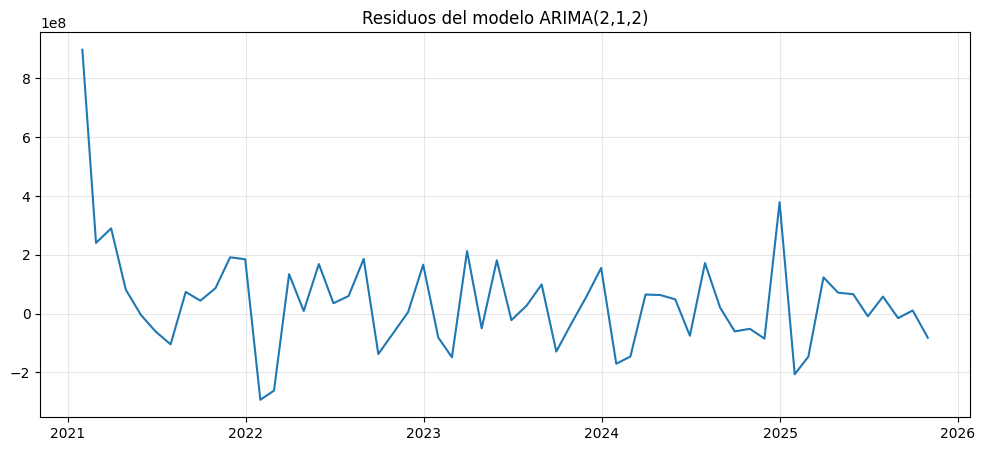

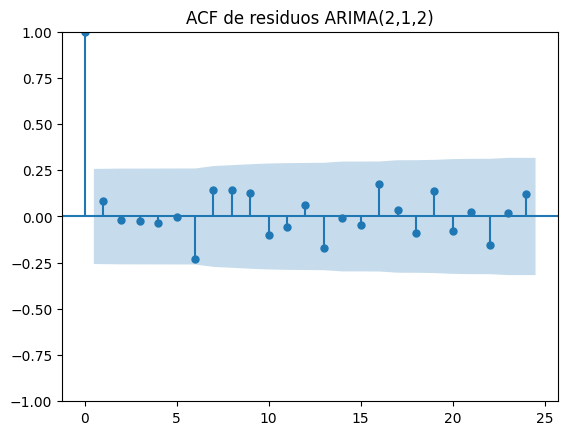

In [26]:
# === Analisis de residuis con ARIMA(2,1,2) ===

#importacion de librerias
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

residuos = resultado_212.resid

# Gráfico de residuos
plt.figure(figsize=(12,5))
plt.plot(residuos)
plt.title("Residuos del modelo ARIMA(2,1,2)")
plt.grid(alpha=0.3)
plt.show()

# ACF de residuos
plot_acf(residuos, lags=24)
plt.title("ACF de residuos ARIMA(2,1,2)")
plt.show()


**Resultados:**

Tras comparar los modelos ARIMA(2,1,1) y ARIMA(2,1,2), se seleccionó el modelo ARIMA(2,1,2) debido a que presenta un menor valor del criterio de información de Akaike (AIC), indicando un mejor ajuste del modelo a la serie temporal del monto facturado con tarjetas de crédito y débito. Adicionalmente, el valor del BIC no presenta diferencias sustanciales entre ambos modelos, lo que justifica la selección del modelo más informativo.

**Conclusión técnica**

El modelo ARIMA(2,1,2) es adecuado

Cumple:

- Estacionariedad (tras diferenciación)

- Buen ajuste (AIC menor)

- Residuos ~ ruido blanco

- NO es necesario probar más modelos ya que sería un sobreajuste y no aporta valor

El diagnóstico de residuos del modelo ARIMA(2,1,2) evidencia un comportamiento aleatorio alrededor de la media cero, sin patrones sistemáticos visibles. Asimismo, el análisis de la función de autocorrelación (ACF) de los residuos muestra que todos los coeficientes se encuentran dentro de las bandas de confianza, lo que indica ausencia de autocorrelación remanente. En consecuencia, se concluye que el modelo ARIMA(2,1,2) es estadísticamente adecuado para la serie analizada.

### **Entrenamiento y prueba de serie para prediccion**

Se realiza el entrenamiento de la serie en base al historico de la base de datos para predicciones futuras, tomando como entrenamiento un 80% de los datos y para pruebas un 20%.

In [27]:
# División de la serie en entrenamiento y prueba
train_size = int(len(serie_monto_total) * 0.8)

train = serie_monto_total.iloc[:train_size]
test = serie_monto_total.iloc[train_size:]

print("Observaciones entrenamiento:", len(train))
print("Observaciones prueba:", len(test))

Observaciones entrenamiento: 46
Observaciones prueba: 12


In [28]:
# Ajuste del modelo ARIMA(2,1,2) con datos de entrenamiento
modelo_train = ARIMA(train, order=(2, 1, 2))
resultado_train = modelo_train.fit()

print(resultado_train.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   46
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -904.669
Date:                Mon, 19 Jan 2026   AIC                           1819.339
Time:                        17:10:05   BIC                           1828.372
Sample:                    01-31-2021   HQIC                          1822.706
                         - 10-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4122      0.138      2.984      0.003       0.141       0.683
ar.L2         -0.7854      0.095     -8.278      0.000      -0.971      -0.599
ma.L1         -0.6058      0.153     -3.952      0.0

In [29]:

# Predicción sobre el conjunto de prueba
pred_test = resultado_train.forecast(steps=len(test))


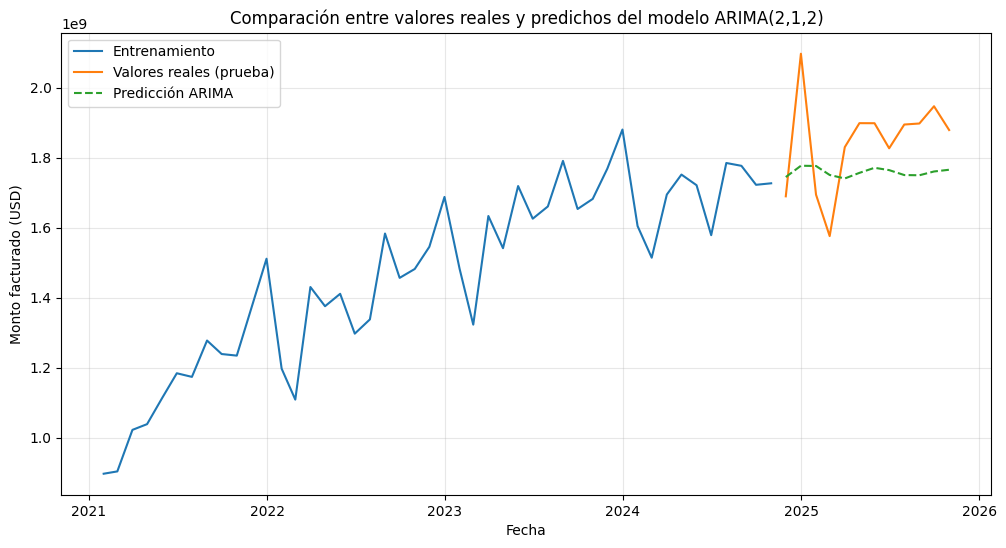

In [30]:
# Comparación valores reales vs predichos
plt.figure(figsize=(12,6))

plt.plot(train.index, train, label="Entrenamiento")
plt.plot(test.index, test, label="Valores reales (prueba)")
plt.plot(test.index, pred_test, label="Predicción ARIMA", linestyle="--")

plt.title("Comparación entre valores reales y predichos del modelo ARIMA(2,1,2)")
plt.xlabel("Fecha")
plt.ylabel("Monto facturado (USD)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### **Pronostico**

Con el uso del modelo validado ARIMA(2,1,2) se realiza la prediccion a 12 meses futuros.

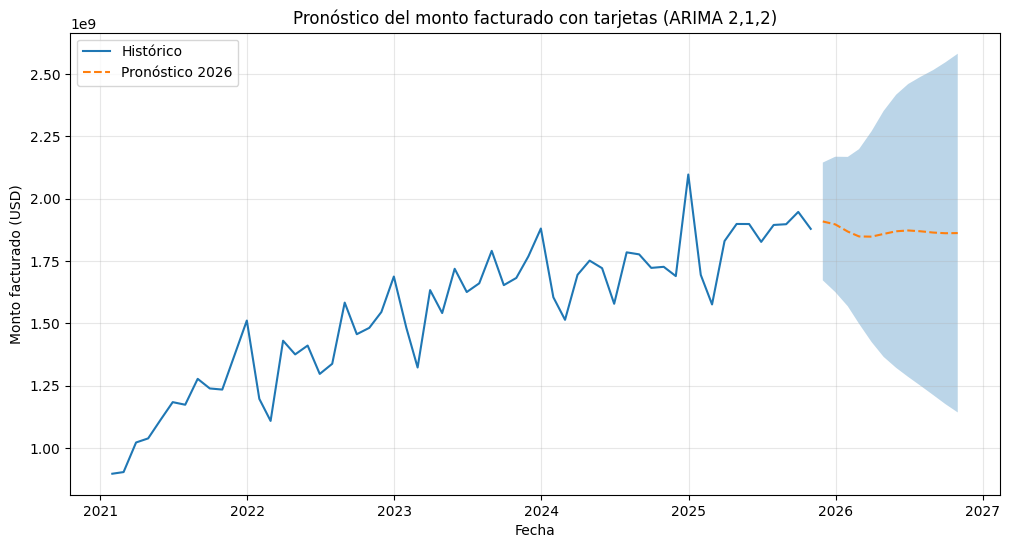

In [31]:
# Pronóstico 12 meses
forecast = resultado_212.get_forecast(steps=12)

# Serie pronosticada
pred = forecast.predicted_mean

# Intervalos de confianza
conf_int = forecast.conf_int()

# Gráfico
plt.figure(figsize=(12,6))
plt.plot(serie_monto_total, label="Histórico")
plt.plot(pred, label="Pronóstico 2026", linestyle="--")

plt.fill_between(
    conf_int.index,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    alpha=0.3
)

plt.title("Pronóstico del monto facturado con tarjetas (ARIMA 2,1,2)")
plt.xlabel("Fecha")
plt.ylabel("Monto facturado (USD)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


**Resultados:**

El modelo muestra rangos probables de consumo, lo cual es coherente con la naturaleza económica del uso de tarjetas.

Muestra:

- Serie histórica real

- Pronóstico esperado

- Banda de incertidumbre (intervalos de confianza)

**Validación rápida del modelo (ARIMA 2,1,2)**

Se obtuvo:

- Estacionariedad: Serie diferenciada estacionaria (ADF p-value ≪ 0.05) → correcto

- Selección de modelo: ARIMA(2,1,2) mejor AIC que ARIMA(2,1,1)

                       BIC ligeramente mayor → normal con más parámetros

- Diagnóstico de residuos: Residuos con media cercana a 0 sin autocorrelación significativa (ACF residuos dentro de bandas)
- Ljung-Box no rechaza H₀: El modelo es estadísticamente válido

### **Interpretación de la gráfica**
**Serie histórica**

- Tendencia creciente clara 2021–2025

- Picos asociados a:

      Recuperación post-pandemia

      Expansión del uso de tarjetas

      Incremento del consumo digital

- El pronóstico del 2026 no predice un crecimiento explosivo

- Se observa una estabilización del consumo y oscilaciones suaves del mismo nivel de 2025

**Banda de confianza (zona azul)**

- A medida que avanza el tiempo aumenta la incertidumbre

- El rango se abre (normal en series económicas) donde a mayor horizonte, menor certeza

### **Conclusión**

El modelo ARIMA(2,1,2) permite capturar adecuadamente la dinámica temporal del monto facturado con tarjetas de crédito y débito en el período 2021–2025.
El pronóstico para 2026 sugiere una estabilización del consumo, con fluctuaciones moderadas y un rango de incertidumbre creciente, coherente con la naturaleza del comportamiento económico del pais.